In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
import regex as re

In [2]:
fifa=pd.read_csv('fifa_clean_def.csv')

/Users/cnieto/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
fifa.head()

sofifa_id         short_name  overall  potential    value_eur  wage_eur  \
0     158023           L. Messi       93         93   78000000.0  320000.0   
1     188545     R. Lewandowski       92         92  119500000.0  270000.0   
2      20801  Cristiano Ronaldo       91         91   45000000.0  270000.0   
3     190871          Neymar Jr       91         91  129000000.0  270000.0   
4     192985       K. De Bruyne       91         91  125500000.0  350000.0   

   age         dob  height_cm  weight_kg  ... rdm rwb  lb lcb  cb rcb  rb  gk  \
0   34  1987-06-24        170         72  ...  64  66  61  50  50  50  61  19   
1   32  1988-08-21        185         81  ...  66  64  61  60  60  60  61  19   
2   36  1985-02-05        187         83  ...  59  63  60  53  53  53  60  20   
3   29  1992-02-05        175         68  ...  63  67  62  50  50  50  62  20   
4   30  1991-06-28        181         70  ...  80  79  75  69  69  69  75  21   

  work_rate_attacking  work_rate_deffensive  
0                   2                     1  
1                   3                     2  
2                   3                     1  
3                   3                     2  
4                   3                     3  

[5 rows x 93 columns]

In [4]:
fifa.dtypes

sofifa_id                 int64
short_name               object
overall                   int64
potential                 int64
value_eur               float64
                         ...   
rcb                       int64
rb                        int64
gk                        int64
work_rate_attacking       int64
work_rate_deffensive      int64
Length: 93, dtype: object

In [5]:
fifa.shape

(19165, 93)

#### busqueda de correlaciones

In [6]:
plt.rcParams['figure.figsize'] = (40, 40)

<AxesSubplot:>

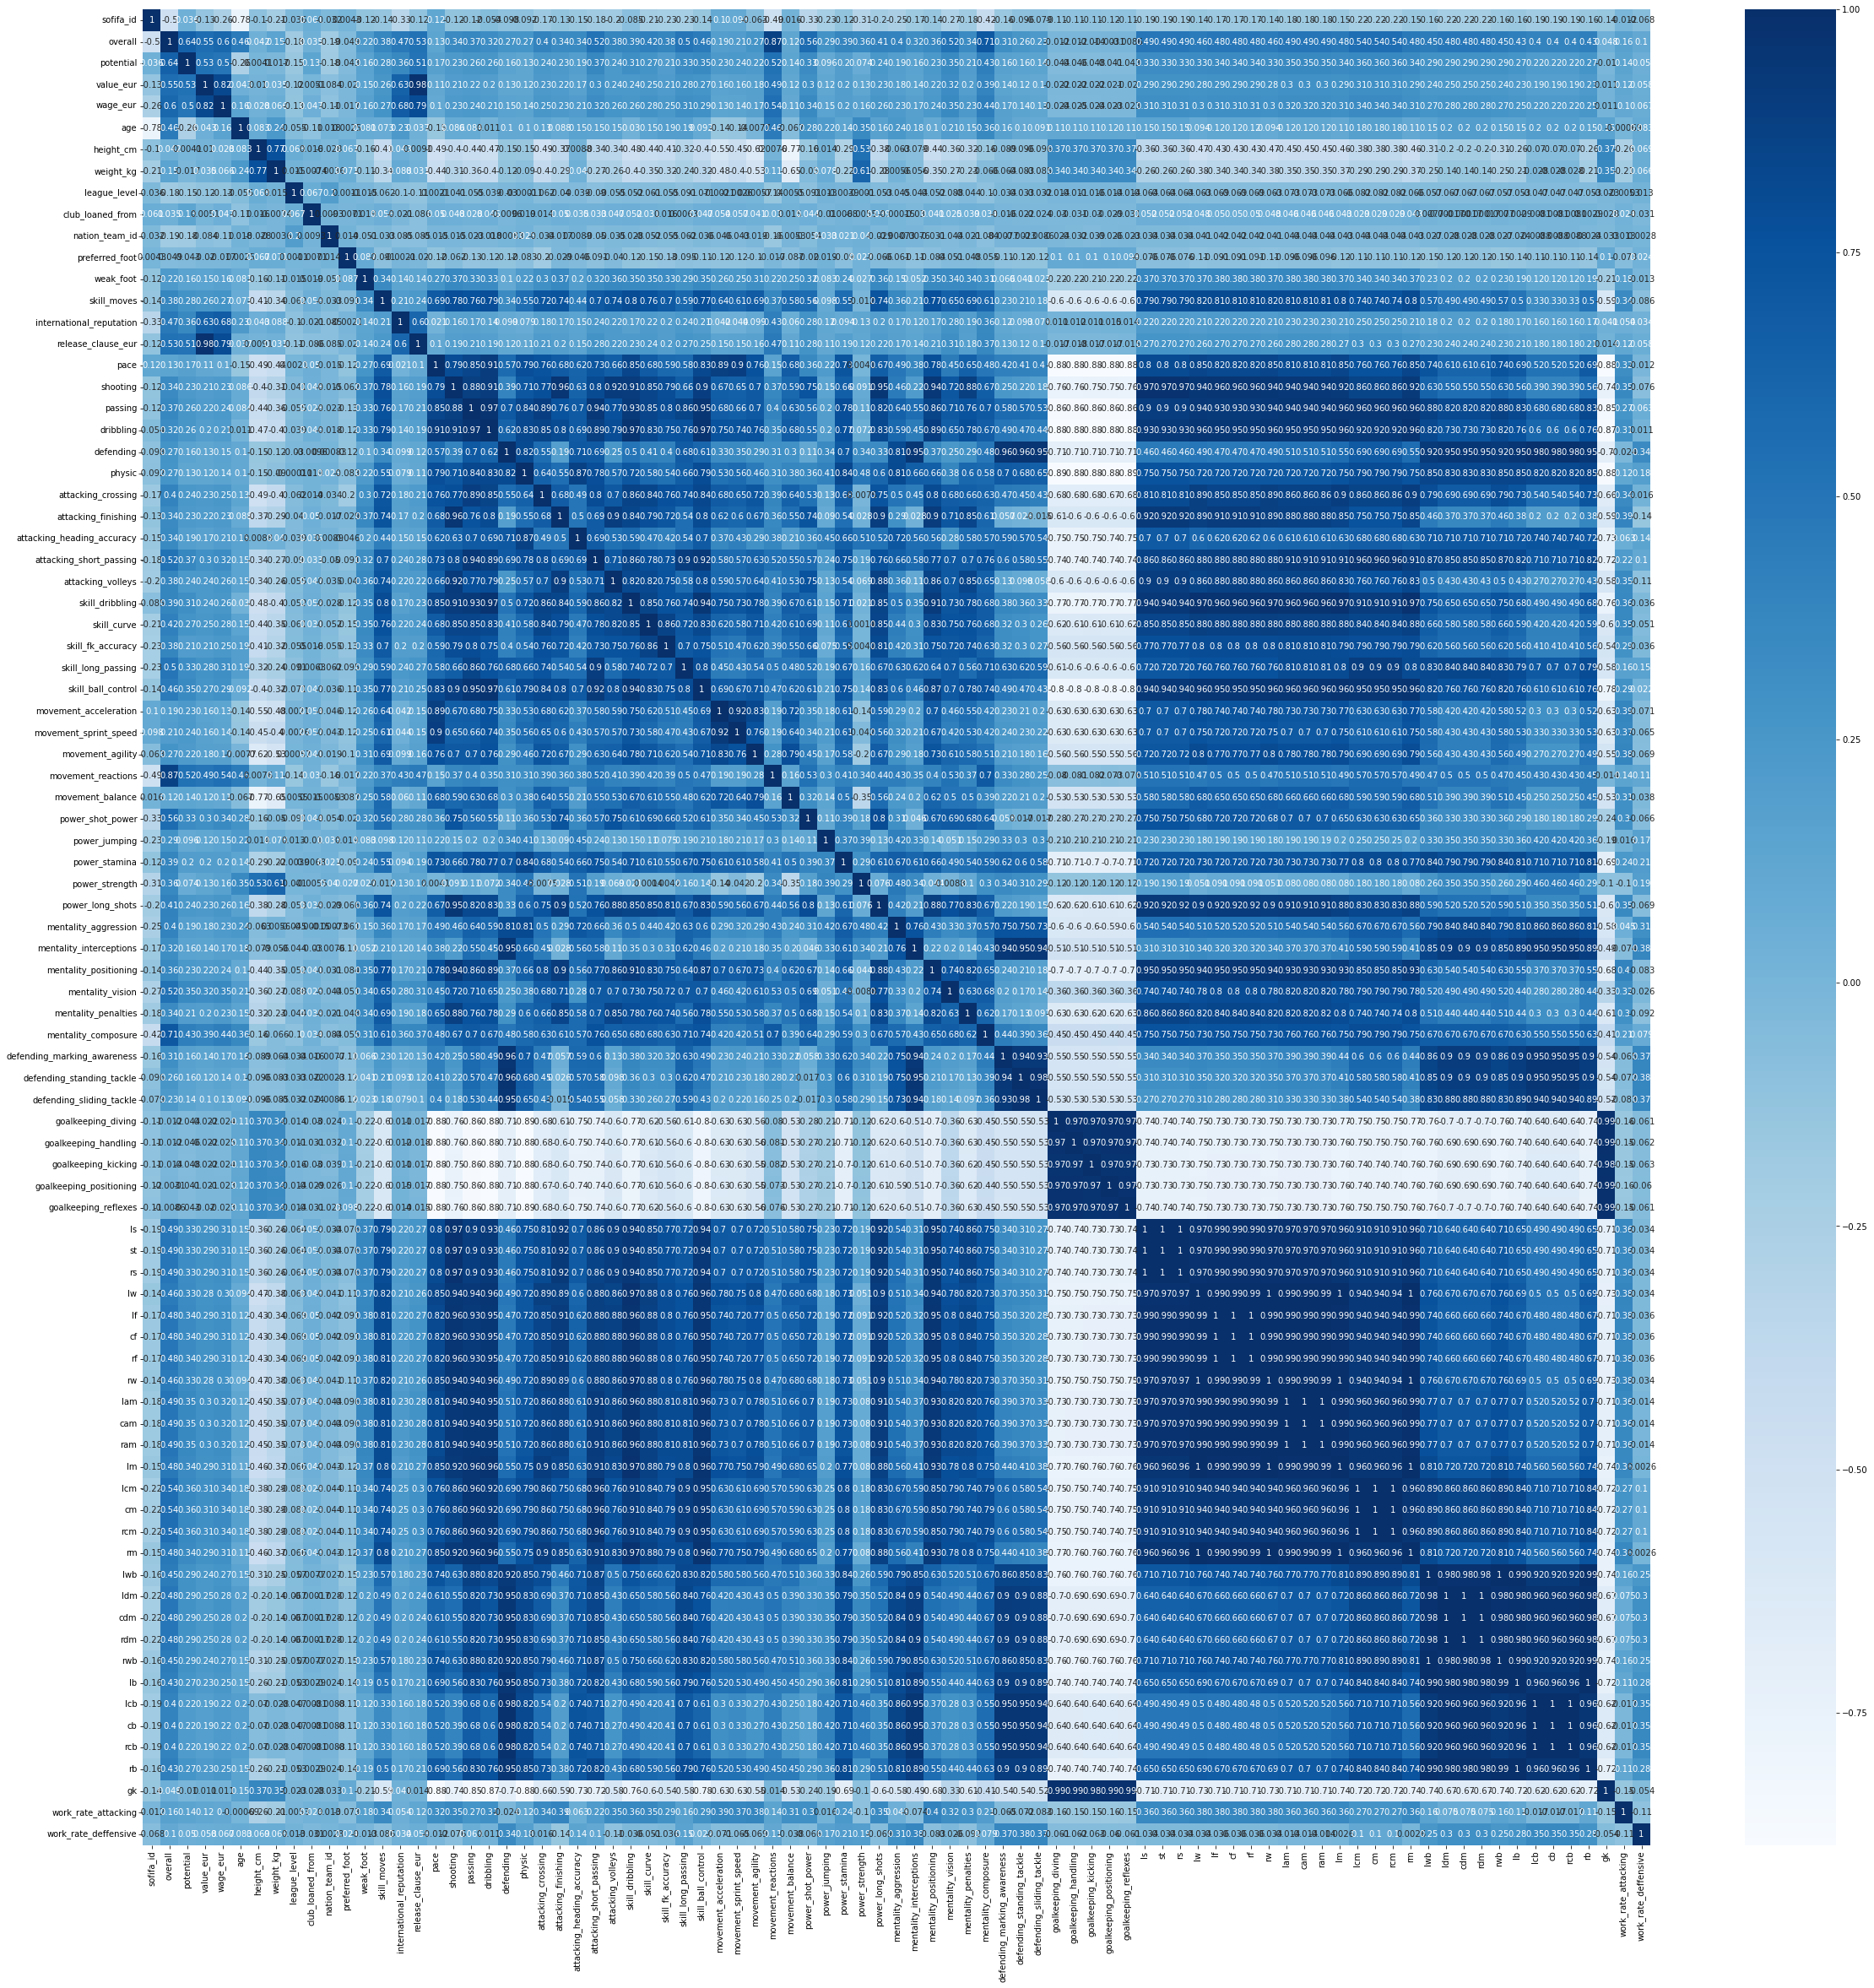

In [7]:
sns.heatmap(fifa.corr(), cmap='Blues', annot=True)

#### demasiadas variables. Nos centramos primero en las que muestran colinearlidad

<AxesSubplot:>

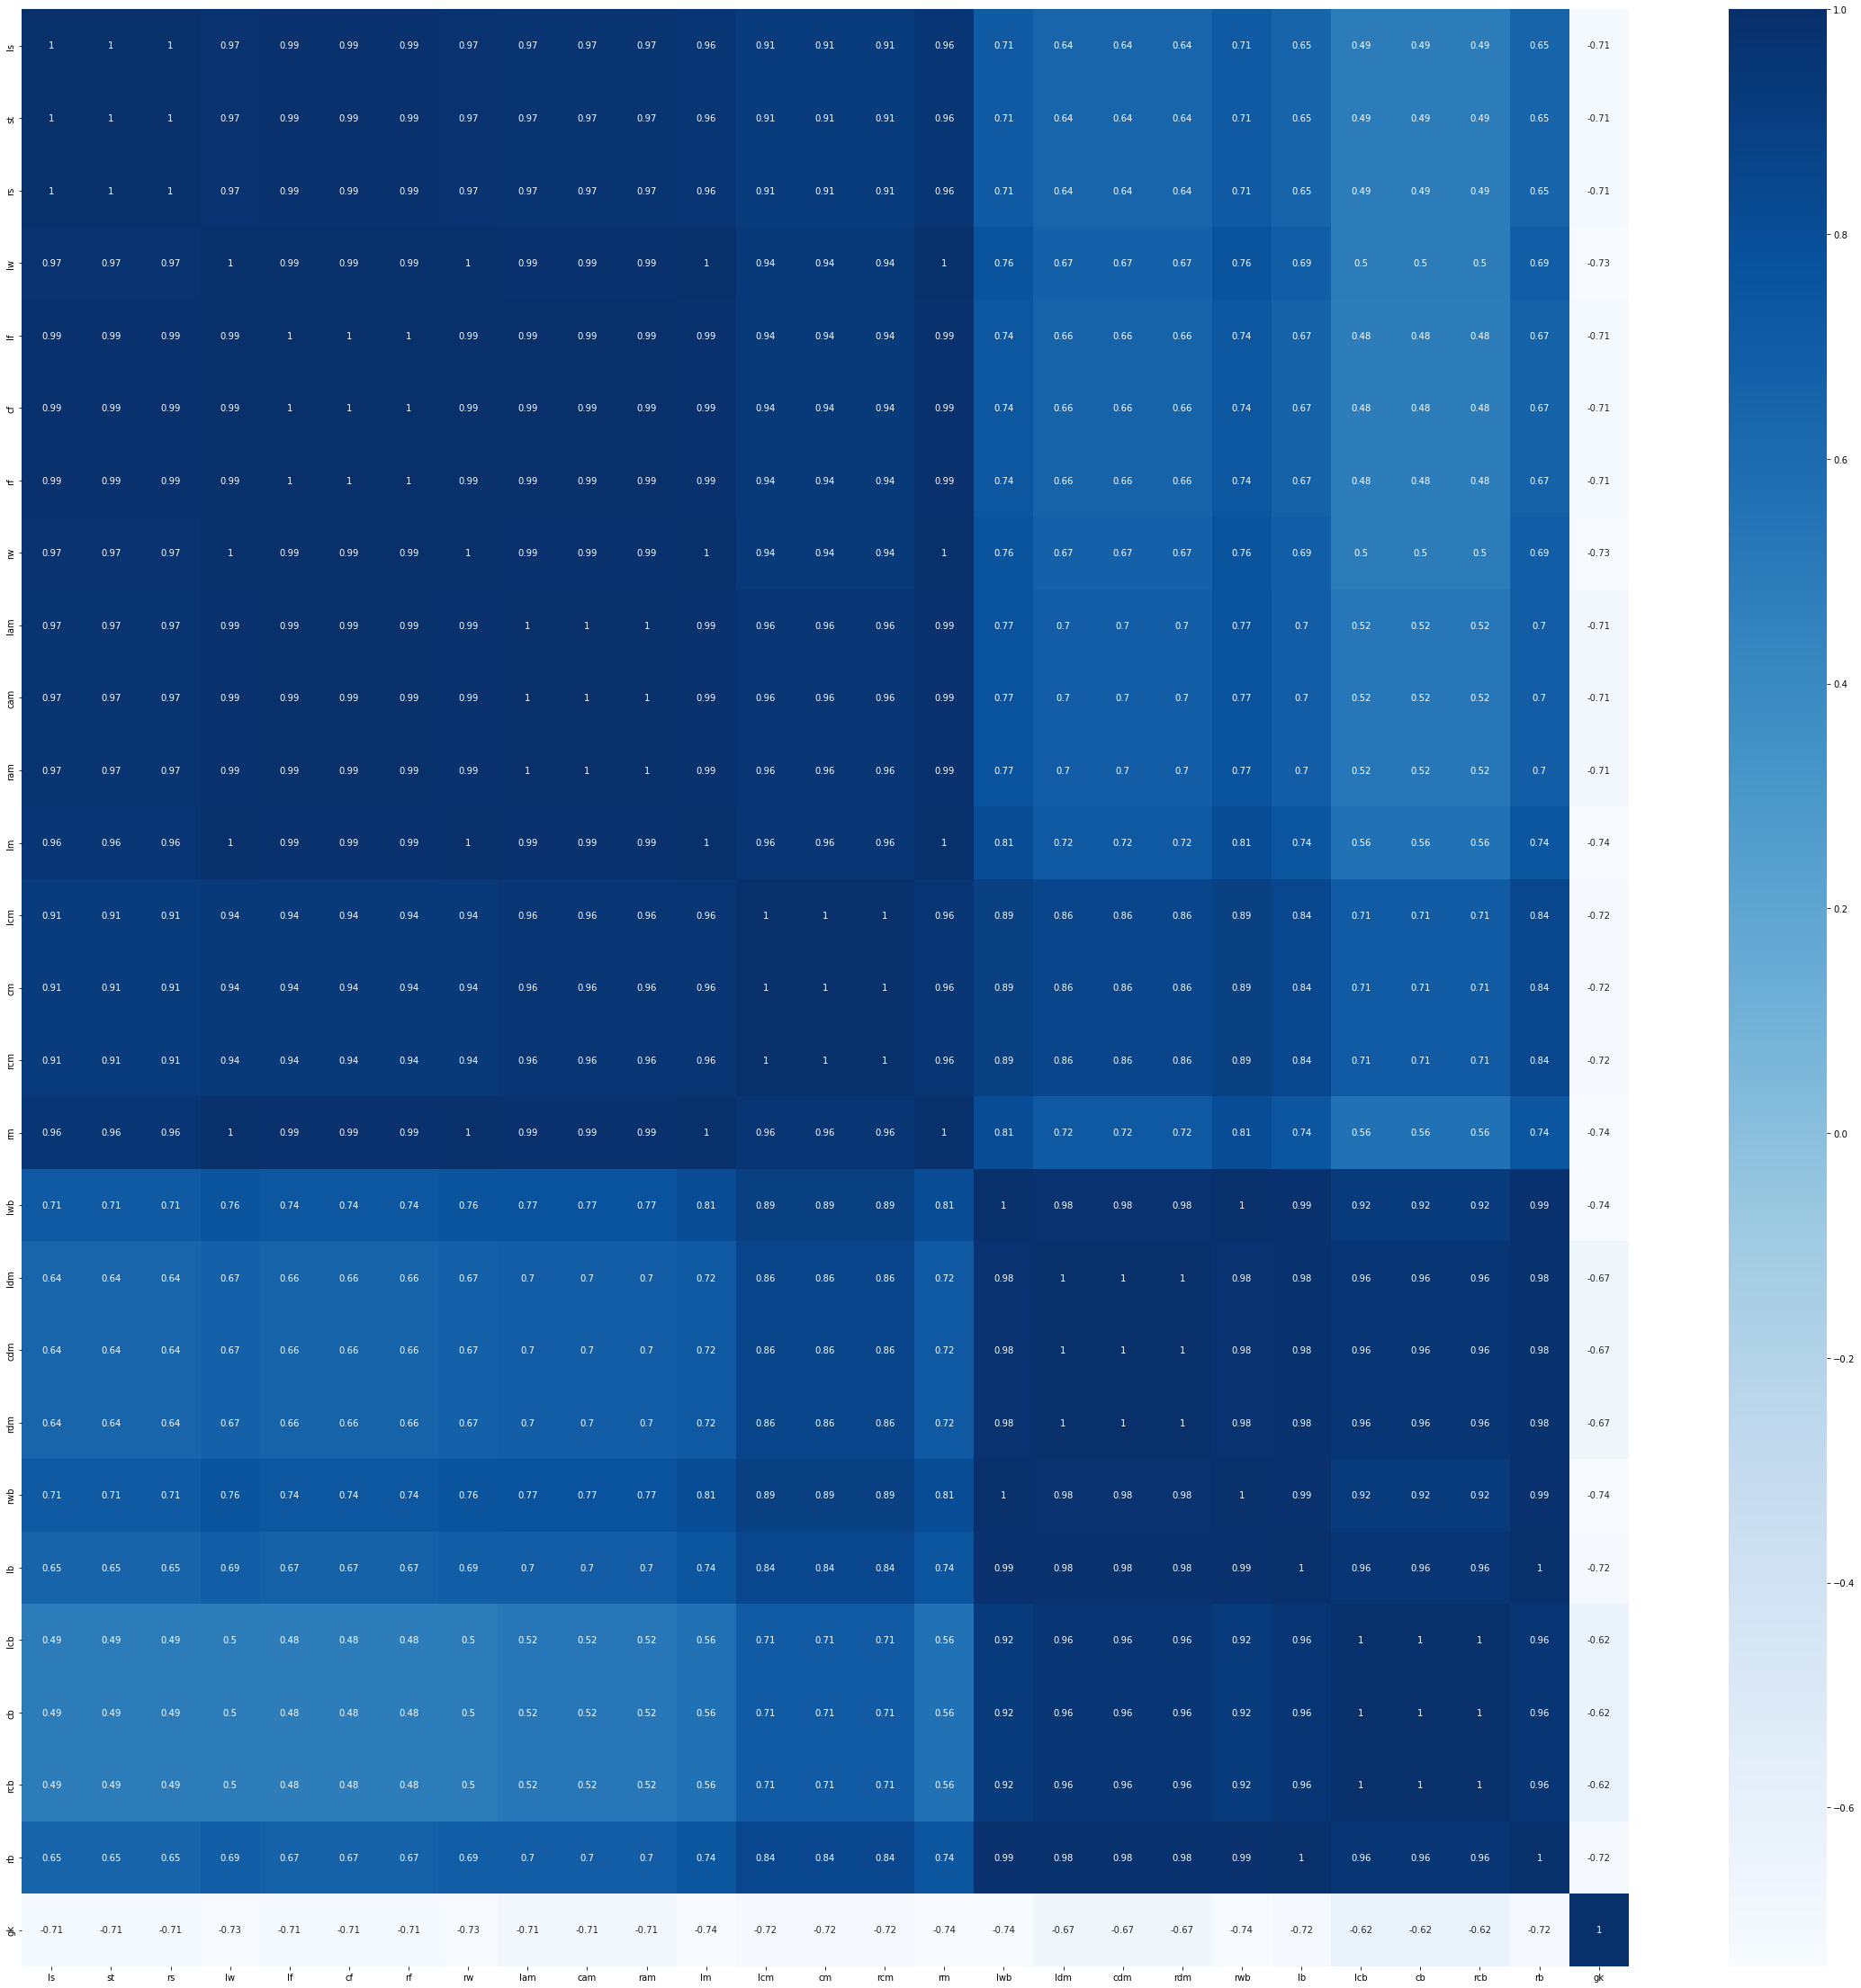

In [8]:
sns.heatmap(fifa[['ls','st','rs','lw','lf','cf','rf','rw','lam',
                      'cam','ram','lm','lcm','cm','rcm','rm','lwb',
                      'ldm','cdm','rdm','rwb','lb','lcb','cb',
                      'rcb','rb','gk']].corr(),cmap='Blues', annot=True)

In [9]:
## hay bloques claros de 3x3 con colinearlidad

In [10]:
## revisamos ls, st y rs

In [11]:
(fifa.ls == fifa.st).value_counts()

True    19165
dtype: int64

In [12]:
(fifa.ls == fifa.rs).value_counts()

True    19165
dtype: int64

In [13]:
## las 3 columnas son exactamente identicas, haremos drop de 2

In [14]:
fifa.drop(['ls','rs'],axis=1,inplace=True)

In [15]:
## revisamos lf, cf y rf

In [16]:
(fifa.lf == fifa.rf).value_counts()

True    19165
dtype: int64

In [17]:
(fifa.lf == fifa.cf).value_counts()

True    19165
dtype: int64

In [18]:
## las 3 columnas son exactamente identicas, haremos drop de 2

In [19]:
fifa.drop(['lf','rf'],axis=1,inplace=True)

In [20]:
## revisamos ram, cac y lam

In [21]:
(fifa.lam == fifa.ram).value_counts()

True    19165
dtype: int64

In [22]:
(fifa.cam == fifa.ram).value_counts()

True    19165
dtype: int64

In [23]:
## las 3 columnas son exactamente identicas, haremos drop de 2

In [24]:
fifa.drop(['lam','ram'],axis=1,inplace=True)

In [25]:
## revisamos rcm, cm y lcm

In [26]:
(fifa.rcm == fifa.lcm).value_counts()

True    19165
dtype: int64

In [27]:
(fifa.rcm == fifa.cm).value_counts()

True    19165
dtype: int64

In [28]:
## las 3 columnas son exactamente identicas, haremos drop de 2

In [29]:
fifa.drop(['lcm','rcm'],axis=1,inplace=True)

In [30]:
## revisamos rdm, cdm y ldm

In [31]:
(fifa.rdm == fifa.ldm).value_counts()

True    19165
dtype: int64

In [32]:
(fifa.rdm == fifa.cdm).value_counts()

True    19165
dtype: int64

In [33]:
## las 3 columnas son exactamente identicas, haremos drop de 2

In [34]:
fifa.drop(['rdm','ldm'],axis=1,inplace=True)

In [35]:
## revisamos rcb, cb y lcb

In [36]:
(fifa.rcb == fifa.lcb).value_counts()

True    19165
dtype: int64

In [37]:
(fifa.rcb == fifa.cb).value_counts()

True    19165
dtype: int64

In [38]:
## las 3 columnas son exactamente identicas, haremos drop de 2

In [39]:
fifa.drop(['rcb','lcb'],axis=1,inplace=True)

In [40]:
fifa.shape

(19165, 81)

In [41]:
# sacamos heatmap again

<AxesSubplot:>

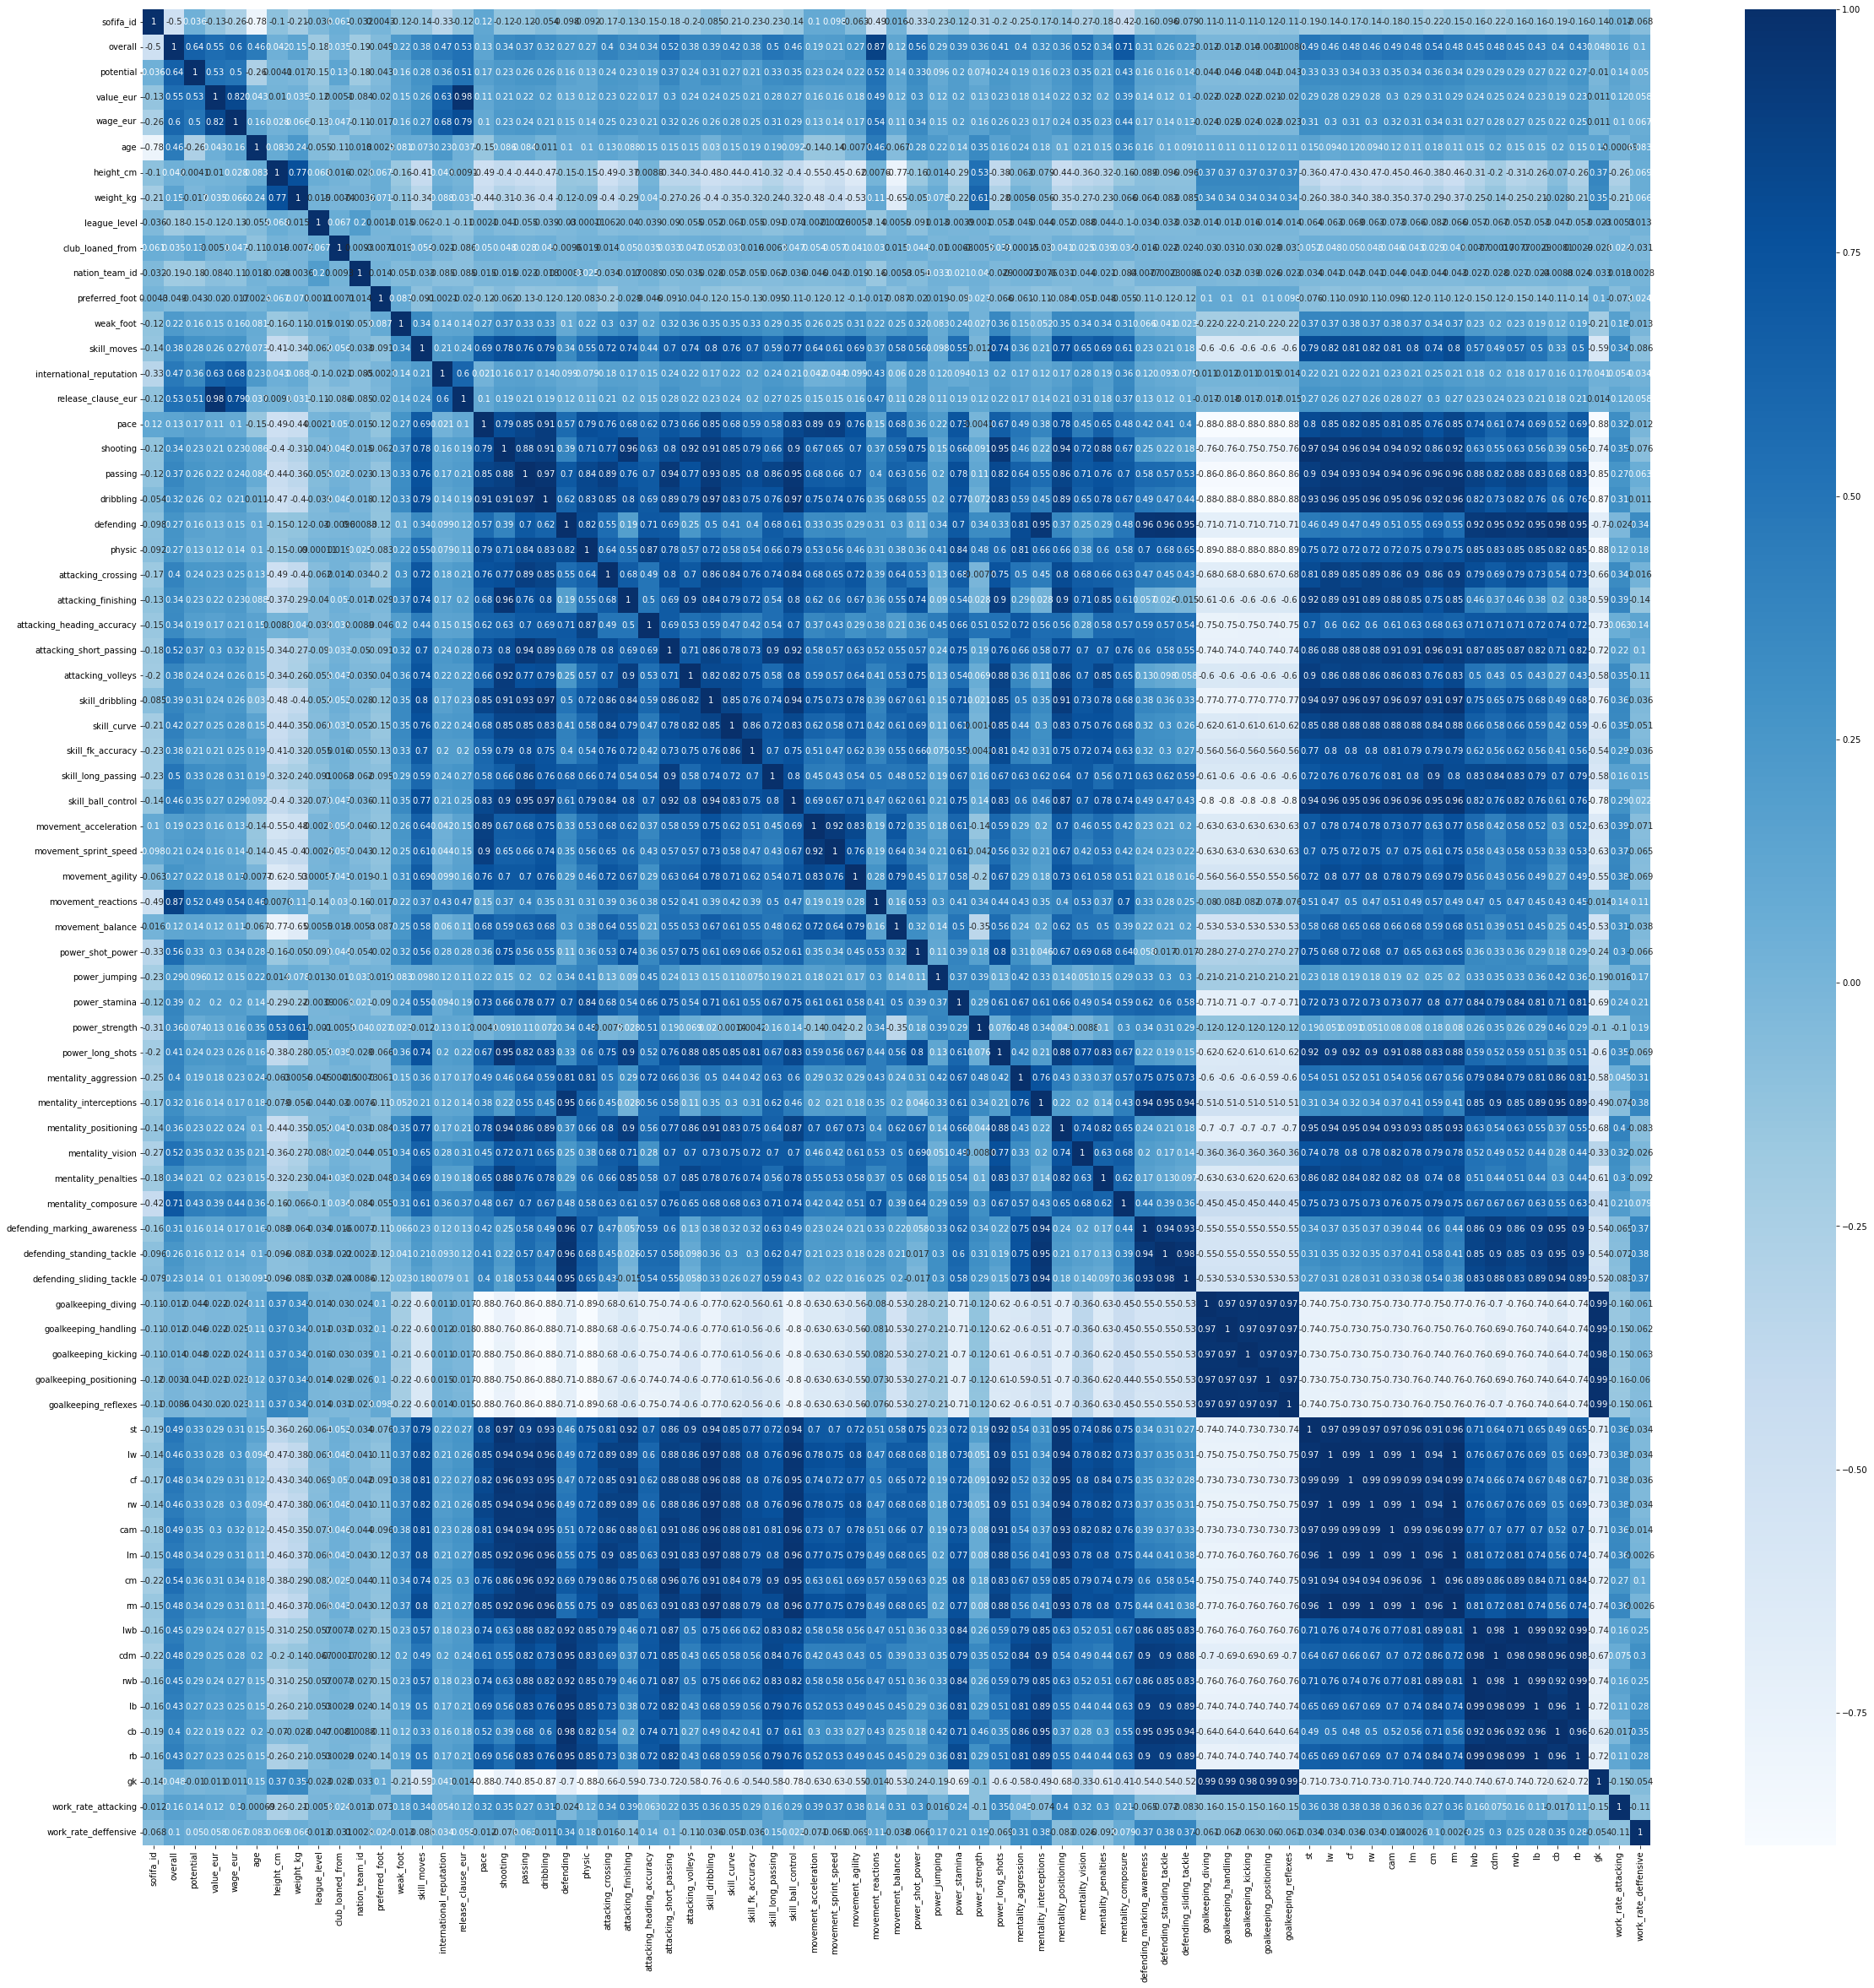

In [42]:
sns.heatmap(fifa.corr(), cmap='Blues', annot=True)

In [43]:
#otras columnas con correlación alta

In [44]:
diving_handling = fifa.goalkeeping_diving == fifa.goalkeeping_handling

In [45]:
diving_handling.value_counts()

False    17446
True      1719
dtype: int64

In [46]:
fifa[['goalkeeping_diving','goalkeeping_handling',
      'goalkeeping_kicking','goalkeeping_positioning',
     'goalkeeping_reflexes']]

goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
0                       6                    11                   15   
1                      15                     6                   12   
2                       7                    11                   15   
3                       9                     9                   15   
4                      15                    13                    5   
...                   ...                   ...                  ...   
19160                   6                    10                    5   
19161                  11                    12                    6   
19162                   8                     6                    7   
19163                   7                    10                    7   
19164                   8                    13                   13   

       goalkeeping_positioning  goalkeeping_reflexes  
0                           14                     8  
1                            8                    10  
2                           14                    11  
3                           15                    11  
4                           10                    13  
...                        ...                   ...  
19160                       15                    13  
19161                        8                    10  
19162                       10                     6  
19163                       14                    15  
19164                        9                    14  

[19165 rows x 5 columns]

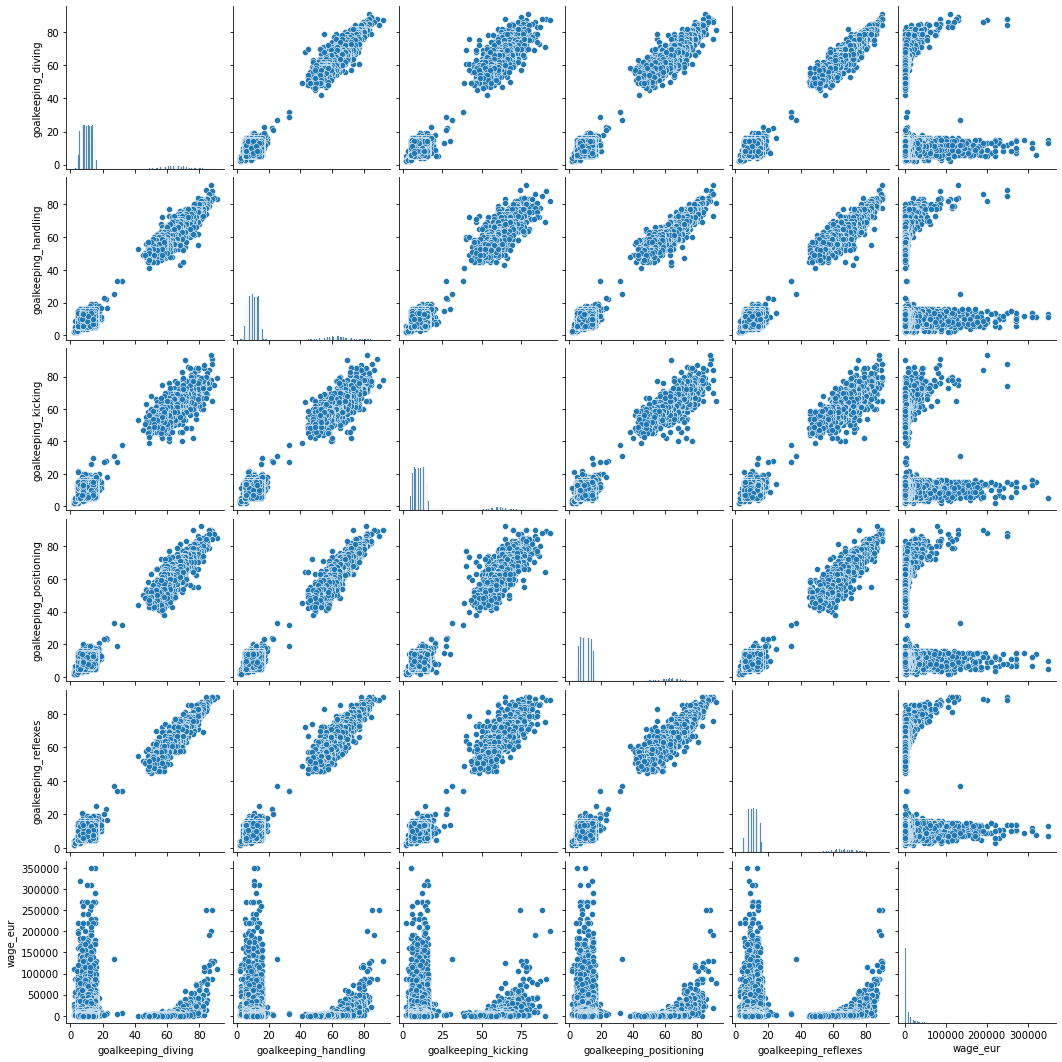

In [47]:
sns.pairplot(fifa[['goalkeeping_diving','goalkeeping_handling',
      'goalkeeping_kicking','goalkeeping_positioning',
     'goalkeeping_reflexes','wage_eur']])

In [48]:
# aunque los valores no coinciden como en el caso anterior, la correlación es clara.
# se podria dejar solo una de las variables y hacer drop del resto para reducir el ruido
# también son candidatas para CLUSTERING

In [49]:
fifa.columns

Index(['sofifa_id', 'short_name', 'overall', 'potential', 'value_eur',
       'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_name',
       'league_name', 'league_level', 'club_position', 'club_loaned_from',
       'club_joined', 'nationality_name', 'nation_team_id', 'nation_position',
       'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'release_clause_eur', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_intercept

In [50]:
# Otros valores con correlación superior a 0.9..

In [51]:
pd.set_option("display.max_columns", None)
fifa.corr()[fifa.corr() > 0.9]

sofifa_id  overall  potential  value_eur  wage_eur  age  \
sofifa_id                   1.0      NaN        NaN        NaN       NaN  NaN   
overall                     NaN      1.0        NaN        NaN       NaN  NaN   
potential                   NaN      NaN        1.0        NaN       NaN  NaN   
value_eur                   NaN      NaN        NaN        1.0       NaN  NaN   
wage_eur                    NaN      NaN        NaN        NaN       1.0  NaN   
...                         ...      ...        ...        ...       ...  ...   
cb                          NaN      NaN        NaN        NaN       NaN  NaN   
rb                          NaN      NaN        NaN        NaN       NaN  NaN   
gk                          NaN      NaN        NaN        NaN       NaN  NaN   
work_rate_attacking         NaN      NaN        NaN        NaN       NaN  NaN   
work_rate_deffensive        NaN      NaN        NaN        NaN       NaN  NaN   

                      height_cm  weight_kg  league_level  club_loaned_from  \
sofifa_id                   NaN        NaN           NaN               NaN   
overall                     NaN        NaN           NaN               NaN   
potential                   NaN        NaN           NaN               NaN   
value_eur                   NaN        NaN           NaN               NaN   
wage_eur                    NaN        NaN           NaN               NaN   
...                         ...        ...           ...               ...   
cb                          NaN        NaN           NaN               NaN   
rb                          NaN        NaN           NaN               NaN   
gk                          NaN        NaN           NaN               NaN   
work_rate_attacking         NaN        NaN           NaN               NaN   
work_rate_deffensive        NaN        NaN           NaN               NaN   

                      nation_team_id  preferred_foot  weak_foot  skill_moves  \
sofifa_id                        NaN             NaN        NaN          NaN   
overall                          NaN             NaN        NaN          NaN   
potential                        NaN             NaN        NaN          NaN   
value_eur                        NaN             NaN        NaN          NaN   
wage_eur                         NaN             NaN        NaN          NaN   
...                              ...             ...        ...          ...   
cb                               NaN             NaN        NaN          NaN   
rb                               NaN             NaN        NaN          NaN   
gk                               NaN             NaN        NaN          NaN   
work_rate_attacking              NaN             NaN        NaN          NaN   
work_rate_deffensive             NaN             NaN        NaN          NaN   

                      international_reputation  release_clause_eur  pace  \
sofifa_id                                  NaN                 NaN   NaN   
overall                                    NaN                 NaN   NaN   
potential                                  NaN                 NaN   NaN   
value_eur                                  NaN            0.977572   NaN   
wage_eur                                   NaN                 NaN   NaN   
...                                        ...                 ...   ...   
cb                                         NaN                 NaN   NaN   
rb                                         NaN                 NaN   NaN   
gk                                         NaN                 NaN   NaN   
work_rate_attacking                        NaN                 NaN   NaN   
work_rate_deffensive                       NaN                 NaN   NaN   

                      shooting  passing  dribbling  defending  physic  \
sofifa_id                  NaN      NaN        NaN        NaN     NaN   
overall                    NaN      NaN        NaN        NaN     NaN   
potential          

In [52]:
fifa15 = fifa.corr()[fifa.corr() > 0.9].iloc[:15,]

In [53]:
fifa30 = fifa.corr()[fifa.corr() > 0.9].iloc[15:30,]

In [54]:
fifa45 = fifa.corr()[fifa.corr() > 0.9].iloc[30:45,]

In [55]:
fifa60 = fifa.corr()[fifa.corr() > 0.9].iloc[45:60,]

In [56]:
fifa75 = fifa.corr()[fifa.corr() > 0.9].iloc[60:,]

In [57]:
# mostrando 15 primeras filas

In [58]:
fifa15

sofifa_id  overall  potential  value_eur  wage_eur  \
sofifa_id                       1.0      NaN        NaN        NaN       NaN   
overall                         NaN      1.0        NaN        NaN       NaN   
potential                       NaN      NaN        1.0        NaN       NaN   
value_eur                       NaN      NaN        NaN        1.0       NaN   
wage_eur                        NaN      NaN        NaN        NaN       1.0   
age                             NaN      NaN        NaN        NaN       NaN   
height_cm                       NaN      NaN        NaN        NaN       NaN   
weight_kg                       NaN      NaN        NaN        NaN       NaN   
league_level                    NaN      NaN        NaN        NaN       NaN   
club_loaned_from                NaN      NaN        NaN        NaN       NaN   
nation_team_id                  NaN      NaN        NaN        NaN       NaN   
preferred_foot                  NaN      NaN        NaN        NaN       NaN   
weak_foot                       NaN      NaN        NaN        NaN       NaN   
skill_moves                     NaN      NaN        NaN        NaN       NaN   
international_reputation        NaN      NaN        NaN        NaN       NaN   

                          age  height_cm  weight_kg  league_level  \
sofifa_id                 NaN        NaN        NaN           NaN   
overall                   NaN        NaN        NaN           NaN   
potential                 NaN        NaN        NaN           NaN   
value_eur                 NaN        NaN        NaN           NaN   
wage_eur                  NaN        NaN        NaN           NaN   
age                       1.0        NaN        NaN           NaN   
height_cm                 NaN        1.0        NaN           NaN   
weight_kg                 NaN        NaN        1.0           NaN   
league_level              NaN        NaN        NaN           1.0   
club_loaned_from          NaN        NaN        NaN           NaN   
nation_team_id            NaN        NaN        NaN           NaN   
preferred_foot            NaN        NaN        NaN           NaN   
weak_foot                 NaN        NaN        NaN           NaN   
skill_moves               NaN        NaN        NaN           NaN   
international_reputation  NaN        NaN        NaN           NaN   

                          club_loaned_from  nation_team_id  preferred_foot  \
sofifa_id                              NaN             NaN             NaN   
overall                                NaN             NaN             NaN   
potential                              NaN             NaN             NaN   
value_eur                              NaN             NaN             NaN   
wage_eur                               NaN             NaN             NaN   
age                                    NaN             NaN             NaN   
height_cm                              NaN             NaN             NaN   
weight_kg                              NaN             NaN             NaN   
league_level                           NaN             NaN             NaN   
club_loaned_from                       1.0             NaN             NaN   
nation_team_id                         NaN             1.0             NaN   
preferred_foot                         NaN             NaN             1.0   
weak_foot                              NaN             NaN             NaN   
skill_moves                            NaN             NaN             NaN   
international_reputation               NaN             NaN             NaN   

                          weak_foot  skill_moves  international_reputation  \
sofifa_id                       NaN          NaN                       NaN   
overall                         NaN          NaN                       NaN   
potential                       NaN          NaN                       NaN   
value_eur                       NaN          NaN                       NaN   
w

In [59]:
fifa[['value_eur','release_clause_eur','wage_eur']].corr()

value_eur  release_clause_eur  wage_eur
value_eur            1.000000            0.977572  0.823527
release_clause_eur   0.977572            1.000000  0.794262
wage_eur             0.823527            0.794262  1.000000

<AxesSubplot:>

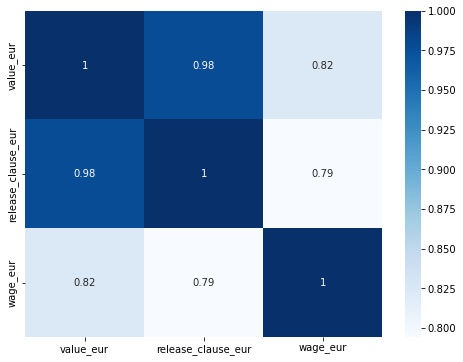

In [60]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.heatmap(fifa[['value_eur','release_clause_eur','wage_eur']].corr(),annot=True,cmap='Blues')

In [61]:
value_release = fifa.release_clause_eur == fifa.value_eur

In [62]:
value_release.value_counts()

False    19165
dtype: int64

In [63]:
# dropeo release_clause_eur , porque a priori value tiene más correlación la variable de interés

In [64]:
fifa.drop('release_clause_eur',axis=1,inplace=True)

In [65]:
fifa30

sofifa_id  overall  potential  value_eur  \
release_clause_eur                NaN      NaN        NaN   0.977572   
pace                              NaN      NaN        NaN        NaN   
shooting                          NaN      NaN        NaN        NaN   
passing                           NaN      NaN        NaN        NaN   
dribbling                         NaN      NaN        NaN        NaN   
defending                         NaN      NaN        NaN        NaN   
physic                            NaN      NaN        NaN        NaN   
attacking_crossing                NaN      NaN        NaN        NaN   
attacking_finishing               NaN      NaN        NaN        NaN   
attacking_heading_accuracy        NaN      NaN        NaN        NaN   
attacking_short_passing           NaN      NaN        NaN        NaN   
attacking_volleys                 NaN      NaN        NaN        NaN   
skill_dribbling                   NaN      NaN        NaN        NaN   
skill_curve                       NaN      NaN        NaN        NaN   
skill_fk_accuracy                 NaN      NaN        NaN        NaN   

                            wage_eur  age  height_cm  weight_kg  league_level  \
release_clause_eur               NaN  NaN        NaN        NaN           NaN   
pace                             NaN  NaN        NaN        NaN           NaN   
shooting                         NaN  NaN        NaN        NaN           NaN   
passing                          NaN  NaN        NaN        NaN           NaN   
dribbling                        NaN  NaN        NaN        NaN           NaN   
defending                        NaN  NaN        NaN        NaN           NaN   
physic                           NaN  NaN        NaN        NaN           NaN   
attacking_crossing               NaN  NaN        NaN        NaN           NaN   
attacking_finishing              NaN  NaN        NaN        NaN           NaN   
attacking_heading_accuracy       NaN  NaN        NaN        NaN           NaN   
attacking_short_passing          NaN  NaN        NaN        NaN           NaN   
attacking_volleys                NaN  NaN        NaN        NaN           NaN   
skill_dribbling                  NaN  NaN        NaN        NaN           NaN   
skill_curve                      NaN  NaN        NaN        NaN           NaN   
skill_fk_accuracy                NaN  NaN        NaN        NaN           NaN   

                            club_loaned_from  nation_team_id  preferred_foot  \
release_clause_eur                       NaN             NaN             NaN   
pace                                     NaN             NaN             NaN   
shooting                                 NaN             NaN             NaN   
passing                                  NaN             NaN             NaN   
dribbling                                NaN             NaN             NaN   
defending                                NaN             NaN             NaN   
physic                                   NaN             NaN             NaN   
attacking_crossing                       NaN             NaN             NaN   
attacking_finishing                      NaN             NaN             NaN   
attacking_heading_accuracy               NaN             NaN             NaN   
attacking_short_passing                  NaN             NaN             NaN   
attacking_volleys                        NaN             NaN             NaN   
skill_dribbling                          NaN             NaN             NaN   
skill_curve                              NaN             NaN             NaN   
skill_fk_accuracy                        NaN             NaN             NaN   

                            weak_foot  skill_moves  international_reputation  \
release_clause_eur                NaN          NaN                       NaN   
pace                              NaN          NaN                       NaN   
shooting                          NaN          NaN       

<AxesSubplot:>

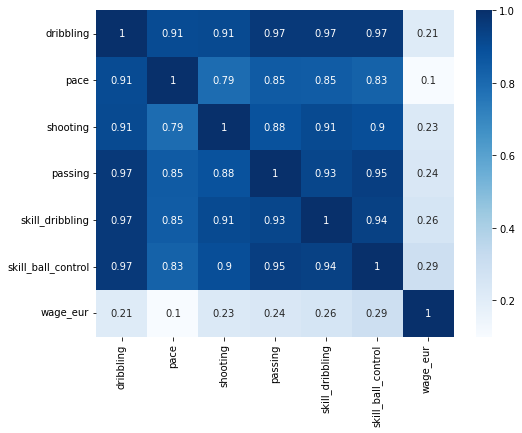

In [66]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.heatmap(fifa[[
    'dribbling',
    'pace',
    'shooting',
                  'passing',
    'skill_dribbling',
    'skill_ball_control',
                 'wage_eur']].corr(),annot=True,cmap='Blues')

In [67]:
# dropeamos dribbling, passing, skill_dribbling por alta colinearlidad
# y nos quedamos con skill_ball_control ya que tiene el valor mas alta con nuestra target

In [68]:
fifa.drop(['dribbling', 'passing', 'skill_dribbling'],axis=1,inplace=True)

In [69]:
# miramos defensa

<AxesSubplot:>

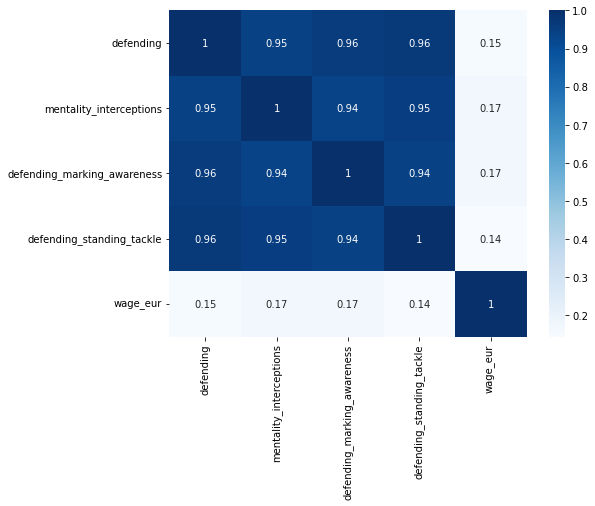

In [70]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.heatmap(fifa[[
    'defending',
    'mentality_interceptions',
    'defending_marking_awareness',
                  'defending_standing_tackle',
    
                 'wage_eur']].corr(),annot=True,cmap='Blues')

In [71]:
fifa.drop(['defending','defending_standing_tackle','defending_marking_awareness'],axis=1,inplace=True)

In [72]:
#miramos attacking

<AxesSubplot:>

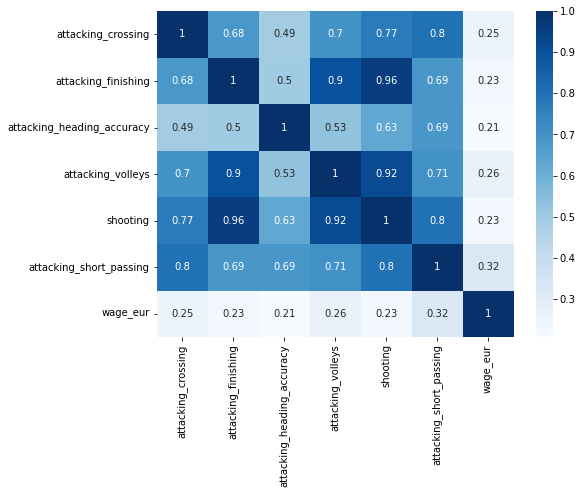

In [73]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.heatmap(fifa[[
    'attacking_crossing',
    'attacking_finishing',
    'attacking_heading_accuracy',
                  'attacking_volleys',
    'shooting',
    'attacking_short_passing',
                 'wage_eur']].corr(),annot=True,cmap='Blues')

In [74]:
fifa.drop('attacking_finishing',axis=1,inplace=True)

In [75]:
fifa45

sofifa_id  overall  potential  value_eur  wage_eur  \
skill_long_passing             NaN      NaN        NaN        NaN       NaN   
skill_ball_control             NaN      NaN        NaN        NaN       NaN   
movement_acceleration          NaN      NaN        NaN        NaN       NaN   
movement_sprint_speed          NaN      NaN        NaN        NaN       NaN   
movement_agility               NaN      NaN        NaN        NaN       NaN   
movement_reactions             NaN      NaN        NaN        NaN       NaN   
movement_balance               NaN      NaN        NaN        NaN       NaN   
power_shot_power               NaN      NaN        NaN        NaN       NaN   
power_jumping                  NaN      NaN        NaN        NaN       NaN   
power_stamina                  NaN      NaN        NaN        NaN       NaN   
power_strength                 NaN      NaN        NaN        NaN       NaN   
power_long_shots               NaN      NaN        NaN        NaN       NaN   
mentality_aggression           NaN      NaN        NaN        NaN       NaN   
mentality_interceptions        NaN      NaN        NaN        NaN       NaN   
mentality_positioning          NaN      NaN        NaN        NaN       NaN   

                         age  height_cm  weight_kg  league_level  \
skill_long_passing       NaN        NaN        NaN           NaN   
skill_ball_control       NaN        NaN        NaN           NaN   
movement_acceleration    NaN        NaN        NaN           NaN   
movement_sprint_speed    NaN        NaN        NaN           NaN   
movement_agility         NaN        NaN        NaN           NaN   
movement_reactions       NaN        NaN        NaN           NaN   
movement_balance         NaN        NaN        NaN           NaN   
power_shot_power         NaN        NaN        NaN           NaN   
power_jumping            NaN        NaN        NaN           NaN   
power_stamina            NaN        NaN        NaN           NaN   
power_strength           NaN        NaN        NaN           NaN   
power_long_shots         NaN        NaN        NaN           NaN   
mentality_aggression     NaN        NaN        NaN           NaN   
mentality_interceptions  NaN        NaN        NaN           NaN   
mentality_positioning    NaN        NaN        NaN           NaN   

                         club_loaned_from  nation_team_id  preferred_foot  \
skill_long_passing                    NaN             NaN             NaN   
skill_ball_control                    NaN             NaN             NaN   
movement_acceleration                 NaN             NaN             NaN   
movement_sprint_speed                 NaN             NaN             NaN   
movement_agility                      NaN             NaN             NaN   
movement_reactions                    NaN             NaN             NaN   
movement_balance                      NaN             NaN             NaN   
power_shot_power                      NaN             NaN             NaN   
power_jumping                         NaN             NaN             NaN   
power_stamina                         NaN             NaN             NaN   
power_strength                        NaN             NaN             NaN   
power_long_shots                      NaN             NaN             NaN   
mentality_aggression                  NaN             NaN             NaN   
mentality_interceptions               NaN             NaN             NaN   
mentality_positioning                 NaN             NaN             NaN   

                         weak_foot  skill_moves  international_reputation  \
skill_long_passing             NaN          NaN                       NaN   
skill_ball_control             NaN          NaN                       NaN   
movement_acceleration          NaN          NaN                       NaN   
movement_sprint_speed          NaN          NaN                       NaN   
movement_agility               NaN          NaN      

<AxesSubplot:>

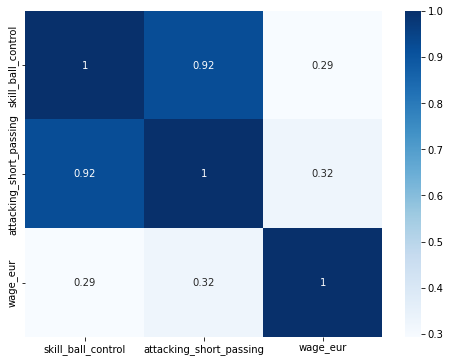

In [76]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.heatmap(fifa[[
    'skill_ball_control',

                  'attacking_short_passing',

                 'wage_eur']].corr(),annot=True,cmap='Blues')

<AxesSubplot:>

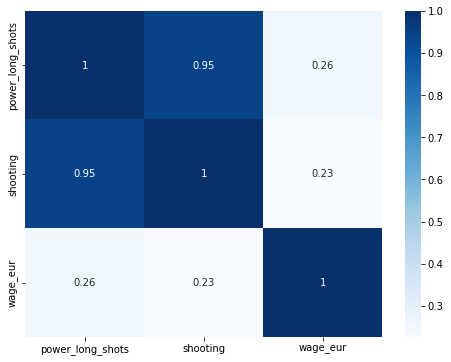

In [77]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.heatmap(fifa[[
    'power_long_shots',

                  'shooting',

                 'wage_eur']].corr(),annot=True,cmap='Blues')

In [78]:
fifa.drop('shooting',axis=1,inplace=True)

In [79]:
fifa60

sofifa_id  overall  potential  value_eur  \
mentality_vision                   NaN      NaN        NaN        NaN   
mentality_penalties                NaN      NaN        NaN        NaN   
mentality_composure                NaN      NaN        NaN        NaN   
defending_marking_awareness        NaN      NaN        NaN        NaN   
defending_standing_tackle          NaN      NaN        NaN        NaN   
defending_sliding_tackle           NaN      NaN        NaN        NaN   
goalkeeping_diving                 NaN      NaN        NaN        NaN   
goalkeeping_handling               NaN      NaN        NaN        NaN   
goalkeeping_kicking                NaN      NaN        NaN        NaN   
goalkeeping_positioning            NaN      NaN        NaN        NaN   
goalkeeping_reflexes               NaN      NaN        NaN        NaN   
st                                 NaN      NaN        NaN        NaN   
lw                                 NaN      NaN        NaN        NaN   
cf                                 NaN      NaN        NaN        NaN   
rw                                 NaN      NaN        NaN        NaN   

                             wage_eur  age  height_cm  weight_kg  \
mentality_vision                  NaN  NaN        NaN        NaN   
mentality_penalties               NaN  NaN        NaN        NaN   
mentality_composure               NaN  NaN        NaN        NaN   
defending_marking_awareness       NaN  NaN        NaN        NaN   
defending_standing_tackle         NaN  NaN        NaN        NaN   
defending_sliding_tackle          NaN  NaN        NaN        NaN   
goalkeeping_diving                NaN  NaN        NaN        NaN   
goalkeeping_handling              NaN  NaN        NaN        NaN   
goalkeeping_kicking               NaN  NaN        NaN        NaN   
goalkeeping_positioning           NaN  NaN        NaN        NaN   
goalkeeping_reflexes              NaN  NaN        NaN        NaN   
st                                NaN  NaN        NaN        NaN   
lw                                NaN  NaN        NaN        NaN   
cf                                NaN  NaN        NaN        NaN   
rw                                NaN  NaN        NaN        NaN   

                             league_level  club_loaned_from  nation_team_id  \
mentality_vision                      NaN               NaN             NaN   
mentality_penalties                   NaN               NaN             NaN   
mentality_composure                   NaN               NaN             NaN   
defending_marking_awareness           NaN               NaN             NaN   
defending_standing_tackle             NaN               NaN             NaN   
defending_sliding_tackle              NaN               NaN             NaN   
goalkeeping_diving                    NaN               NaN             NaN   
goalkeeping_handling                  NaN               NaN             NaN   
goalkeeping_kicking                   NaN               NaN             NaN   
goalkeeping_positioning               NaN               NaN             NaN   
goalkeeping_reflexes                  NaN               NaN             NaN   
st                                    NaN               NaN             NaN   
lw                                    NaN               NaN             NaN   
cf                                    NaN               NaN             NaN   
rw                                    NaN               NaN             NaN   

                             preferred_foot  weak_foot  skill_moves  \
mentality_vision                        NaN        NaN          NaN   
mentality_penalties                     NaN        NaN          NaN   
mentality_composure                     NaN        NaN          NaN   
defending_marking_awareness             NaN        NaN          NaN   
defending_standing_tackle               NaN        NaN          NaN   
defending_sliding_tackle                NaN        NaN          NaN   
goalkeepi

<AxesSubplot:>

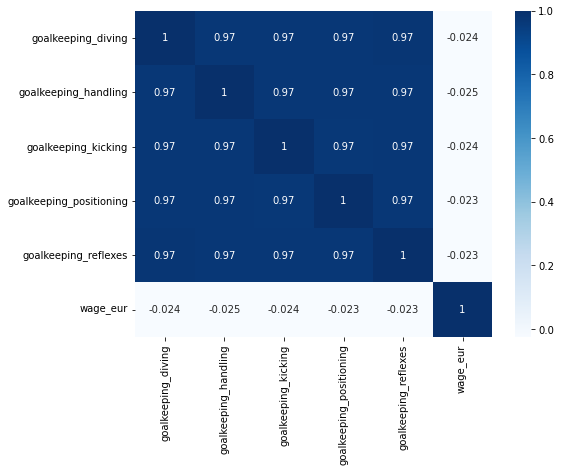

In [80]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.heatmap(fifa[[
    'goalkeeping_diving',

                  'goalkeeping_handling',
    'goalkeeping_kicking',
    'goalkeeping_positioning',
    'goalkeeping_reflexes',

                 'wage_eur']].corr(),annot=True,cmap='Blues')

In [81]:
fifa.drop(['goalkeeping_diving','goalkeeping_kicking','goalkeeping_positioning',
          'goalkeeping_reflexes'],axis=1,inplace=True)

In [82]:
fifa75

sofifa_id  overall  potential  value_eur  wage_eur  age  \
cam                         NaN      NaN        NaN        NaN       NaN  NaN   
lm                          NaN      NaN        NaN        NaN       NaN  NaN   
cm                          NaN      NaN        NaN        NaN       NaN  NaN   
rm                          NaN      NaN        NaN        NaN       NaN  NaN   
lwb                         NaN      NaN        NaN        NaN       NaN  NaN   
cdm                         NaN      NaN        NaN        NaN       NaN  NaN   
rwb                         NaN      NaN        NaN        NaN       NaN  NaN   
lb                          NaN      NaN        NaN        NaN       NaN  NaN   
cb                          NaN      NaN        NaN        NaN       NaN  NaN   
rb                          NaN      NaN        NaN        NaN       NaN  NaN   
gk                          NaN      NaN        NaN        NaN       NaN  NaN   
work_rate_attacking         NaN      NaN        NaN        NaN       NaN  NaN   
work_rate_deffensive        NaN      NaN        NaN        NaN       NaN  NaN   

                      height_cm  weight_kg  league_level  club_loaned_from  \
cam                         NaN        NaN           NaN               NaN   
lm                          NaN        NaN           NaN               NaN   
cm                          NaN        NaN           NaN               NaN   
rm                          NaN        NaN           NaN               NaN   
lwb                         NaN        NaN           NaN               NaN   
cdm                         NaN        NaN           NaN               NaN   
rwb                         NaN        NaN           NaN               NaN   
lb                          NaN        NaN           NaN               NaN   
cb                          NaN        NaN           NaN               NaN   
rb                          NaN        NaN           NaN               NaN   
gk                          NaN        NaN           NaN               NaN   
work_rate_attacking         NaN        NaN           NaN               NaN   
work_rate_deffensive        NaN        NaN           NaN               NaN   

                      nation_team_id  preferred_foot  weak_foot  skill_moves  \
cam                              NaN             NaN        NaN          NaN   
lm                               NaN             NaN        NaN          NaN   
cm                               NaN             NaN        NaN          NaN   
rm                               NaN             NaN        NaN          NaN   
lwb                              NaN             NaN        NaN          NaN   
cdm                              NaN             NaN        NaN          NaN   
rwb                              NaN             NaN        NaN          NaN   
lb                               NaN             NaN        NaN          NaN   
cb                               NaN             NaN        NaN          NaN   
rb                               NaN             NaN        NaN          NaN   
gk                               NaN             NaN        NaN          NaN   
work_rate_attacking              NaN             NaN        NaN          NaN   
work_rate_deffensive             NaN             NaN        NaN          NaN   

                      international_reputation  release_clause_eur  pace  \
cam                                        NaN                 NaN   NaN   
lm                                         NaN                 NaN   NaN   
cm                                         NaN                 NaN   NaN   
rm                                         NaN                 NaN   NaN   
lwb                                        NaN                 NaN   NaN   
cdm                                        NaN                 NaN   NaN   
rwb                                        NaN                 NaN   NaN   
lb                                         NaN                 Na

<AxesSubplot:>

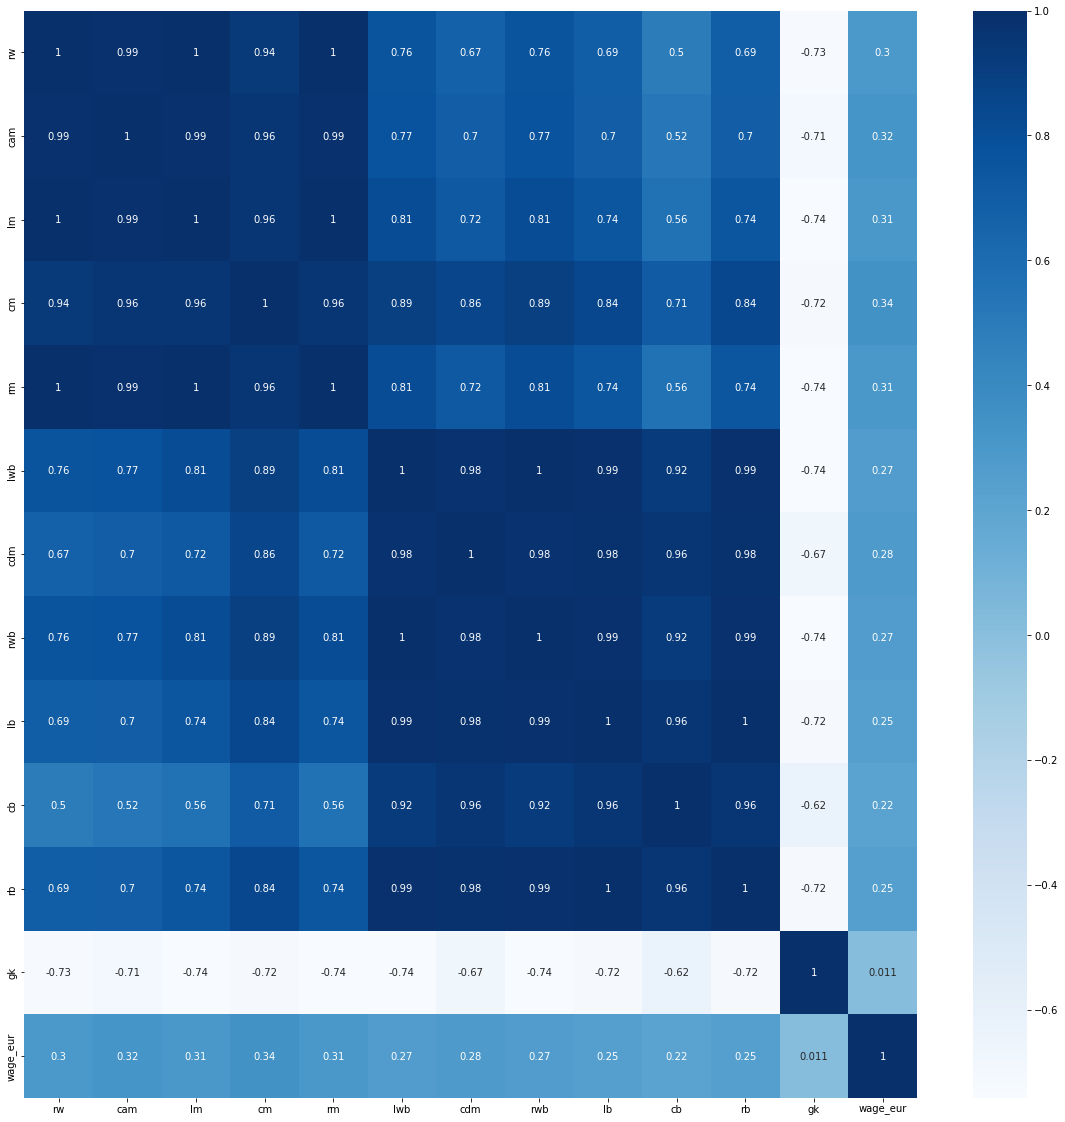

In [83]:
plt.rcParams['figure.figsize'] = (20, 20)
sns.heatmap(fifa[['rw',

    'cam',
    'lm',
    'cm','rm','lwb','cdm','rwb','lb','cb','rb','gk','wage_eur']].corr(),cmap='Blues', annot=True)

In [84]:
fifa.drop(['rw','lm','cm','rm'],axis=1,inplace=True)

<AxesSubplot:>

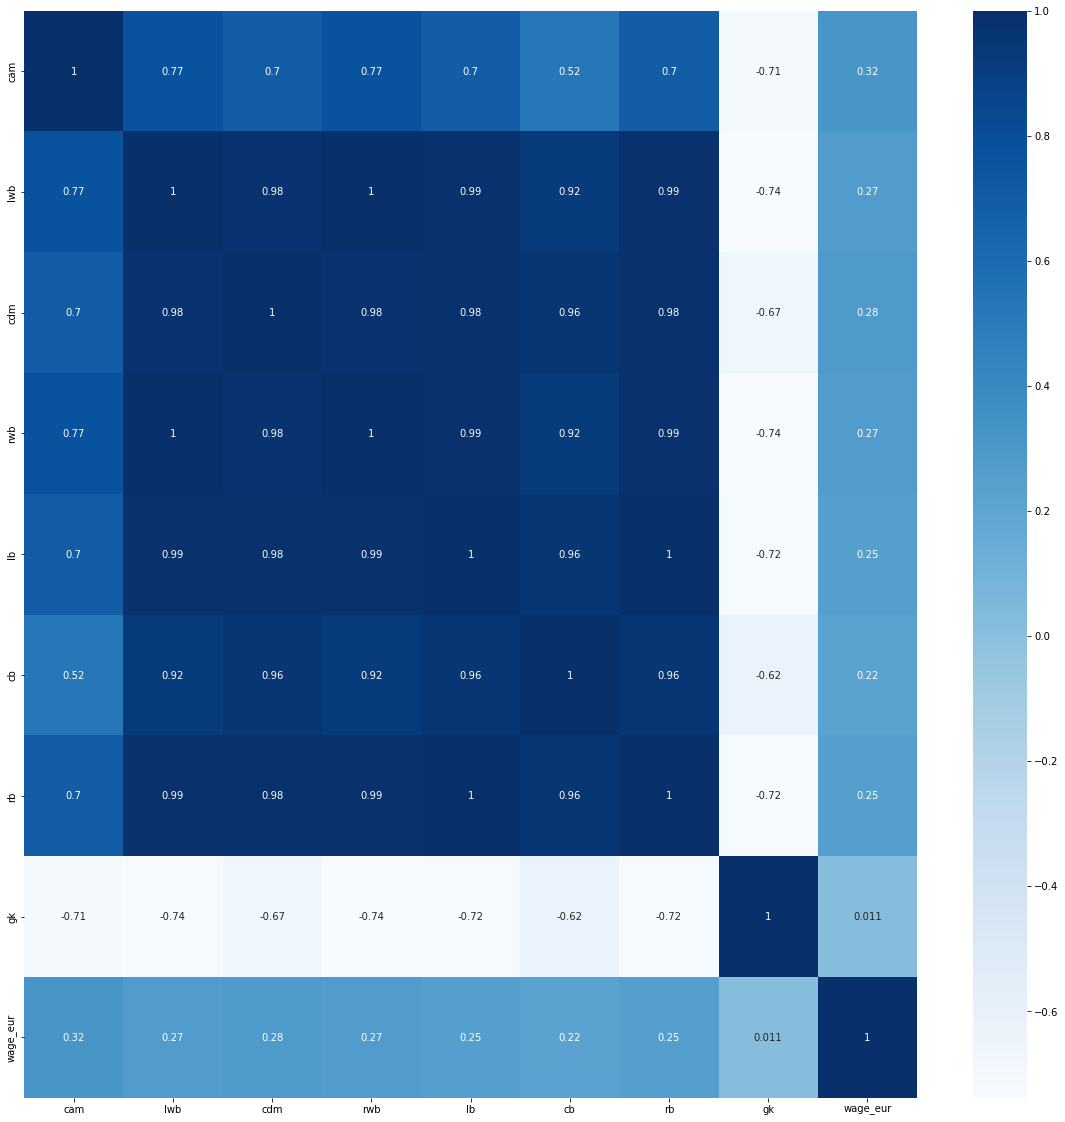

In [85]:
plt.rcParams['figure.figsize'] = (20, 20)
sns.heatmap(fifa[[

    'cam',
    
    'lwb','cdm','rwb','lb','cb','rb','gk','wage_eur']].corr(),cmap='Blues', annot=True)

In [86]:
fifa.drop(['rwb','rb','lwb'],axis=1,inplace=True)

<AxesSubplot:>

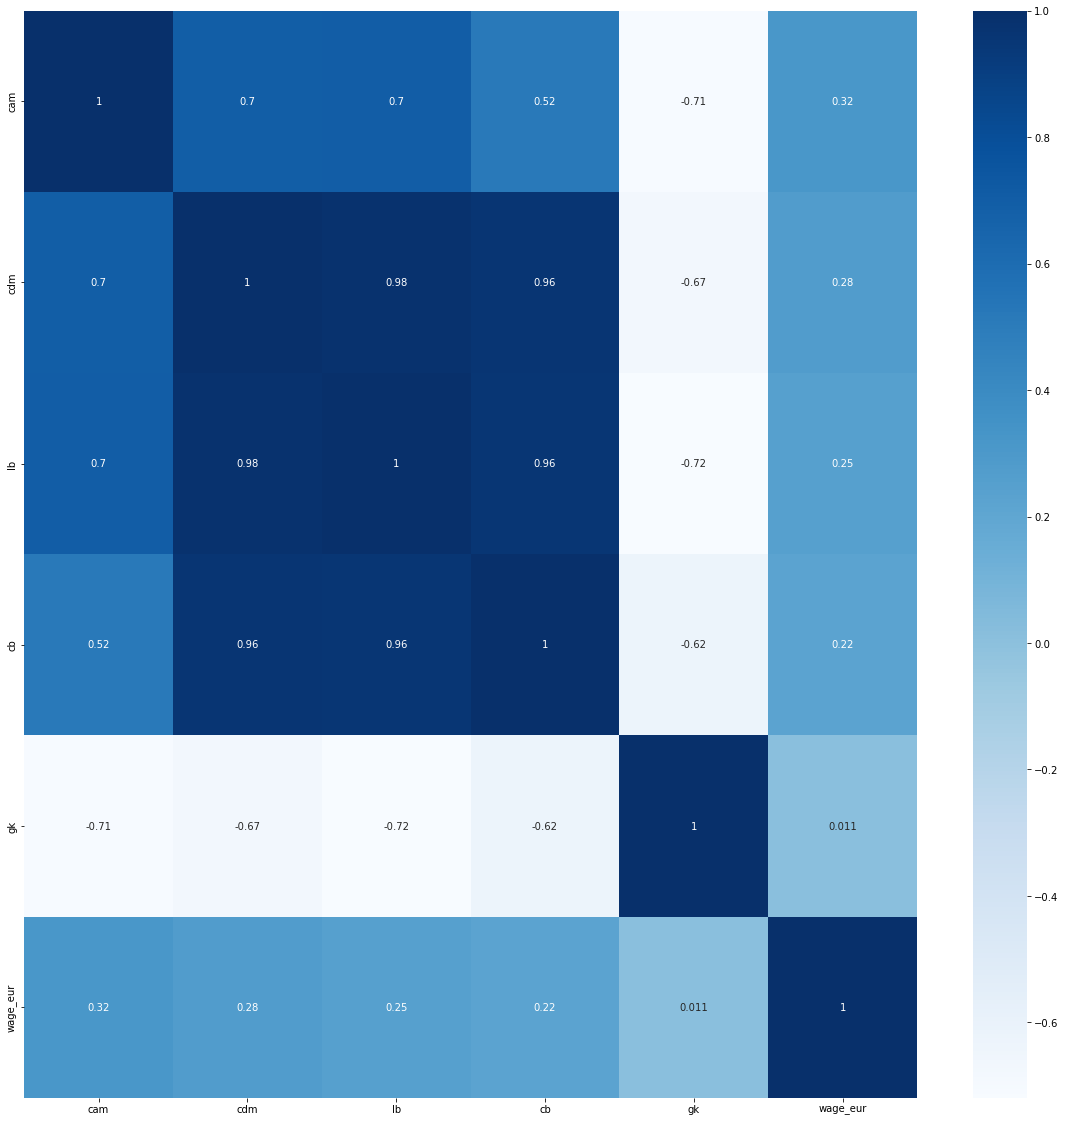

In [87]:
plt.rcParams['figure.figsize'] = (20, 20)
sns.heatmap(fifa[[

    'cam',
    
    'cdm','lb','cb','gk','wage_eur']].corr(),cmap='Blues', annot=True)

In [88]:
fifa.drop(['cb','lb'],axis=1,inplace=True)

In [89]:
fifa.shape

(19165, 59)

<AxesSubplot:>

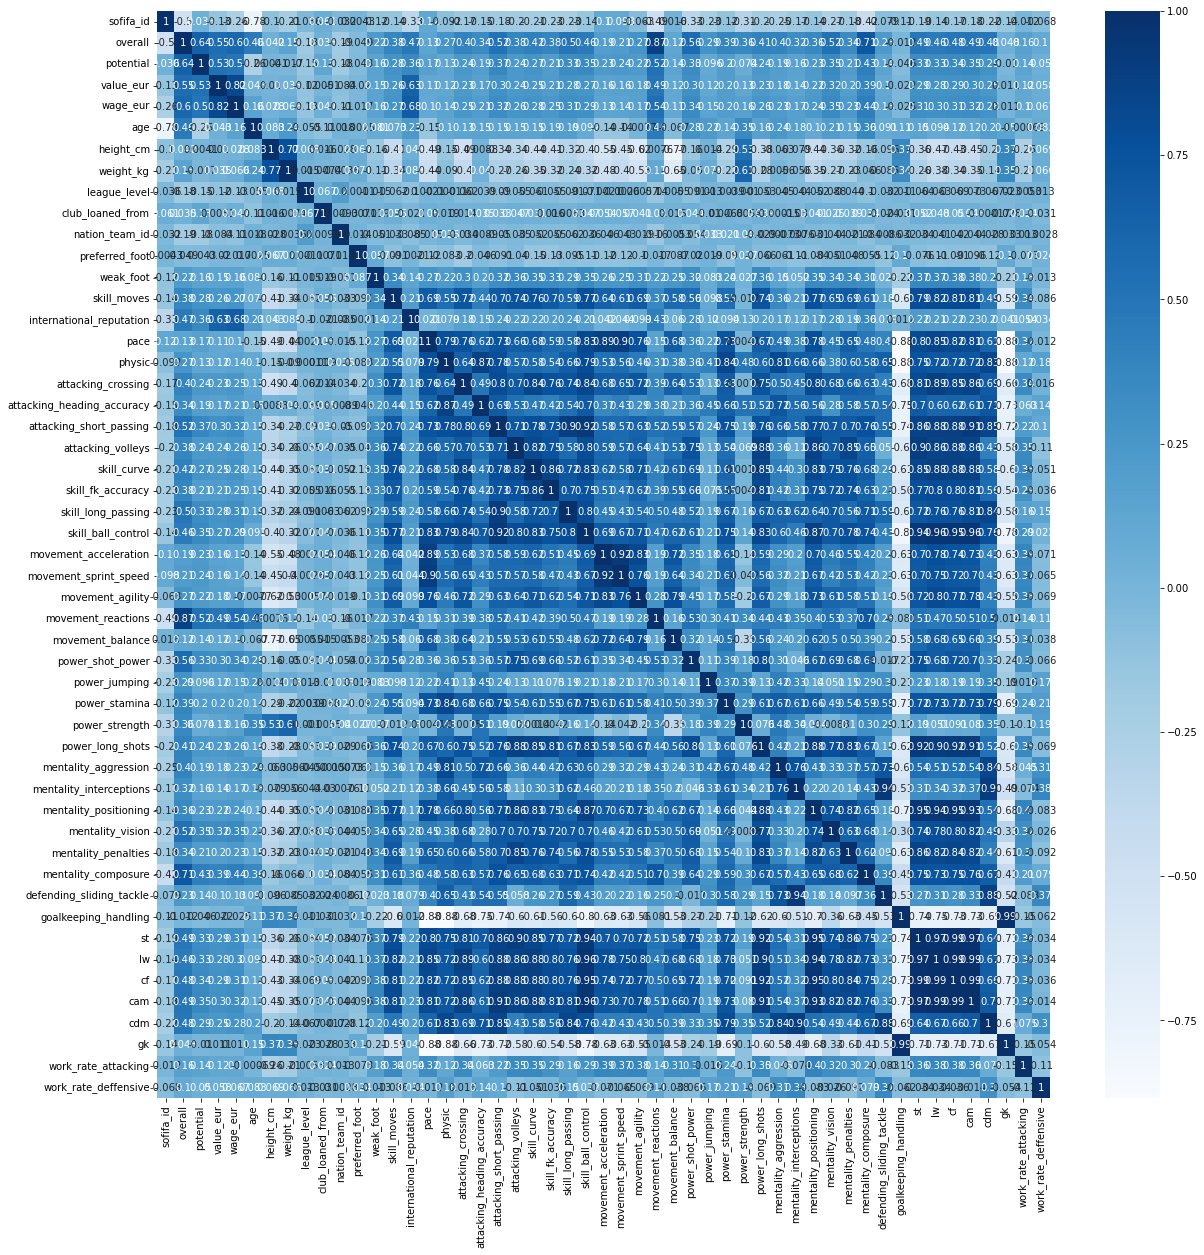

In [90]:
plt.rcParams['figure.figsize'] = (20, 20)
sns.heatmap(fifa.corr(), cmap='Blues', annot=True)

<AxesSubplot:>

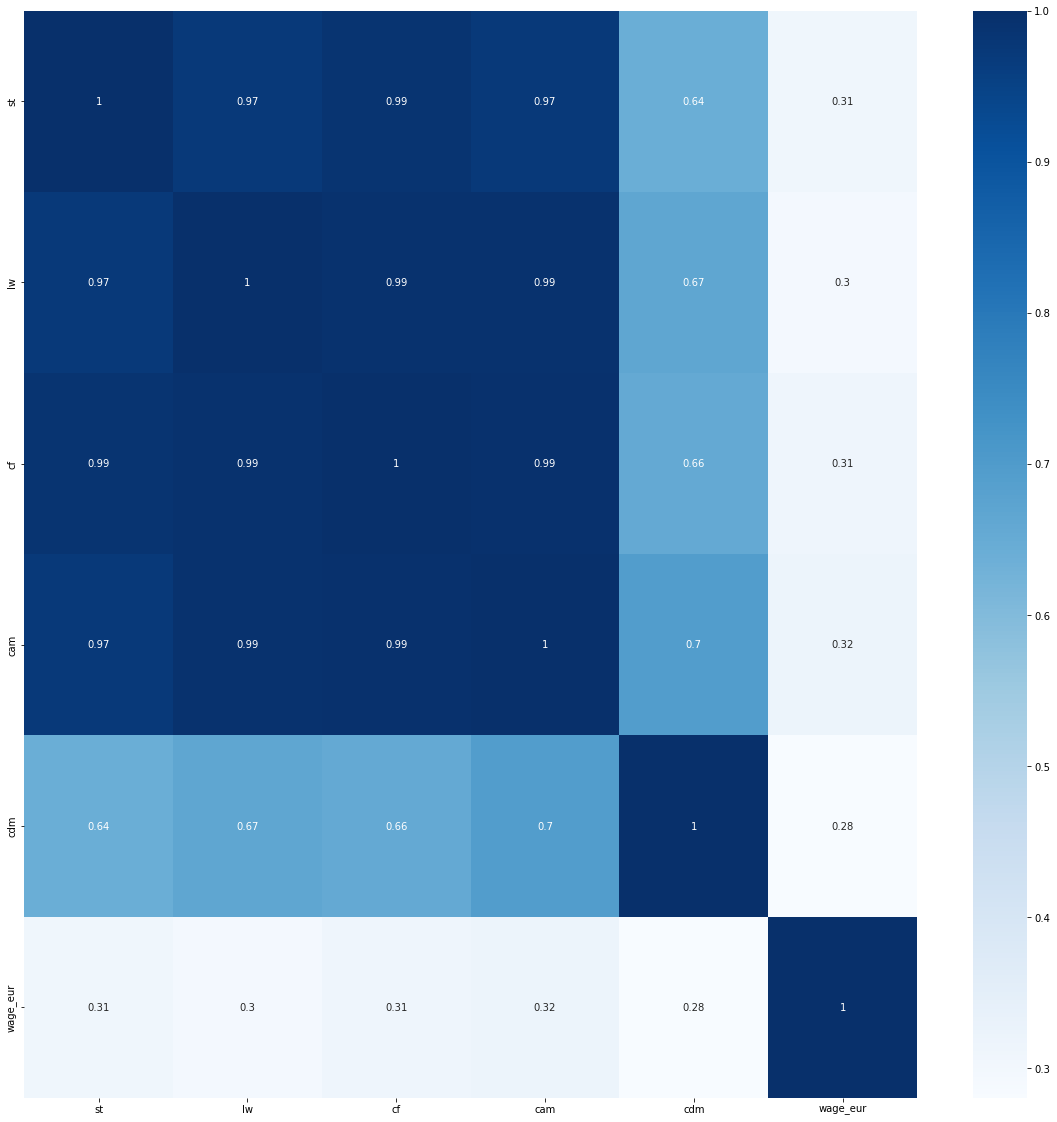

In [91]:
plt.rcParams['figure.figsize'] = (20, 20)
sns.heatmap(fifa[[

    'st',
    
    'lw','cf','cam','cdm','wage_eur']].corr(),cmap='Blues', annot=True)

In [92]:
fifa.drop(['st','lw','cf'],axis=1,inplace=True)

In [93]:
fifa.shape

(19165, 56)

<AxesSubplot:>

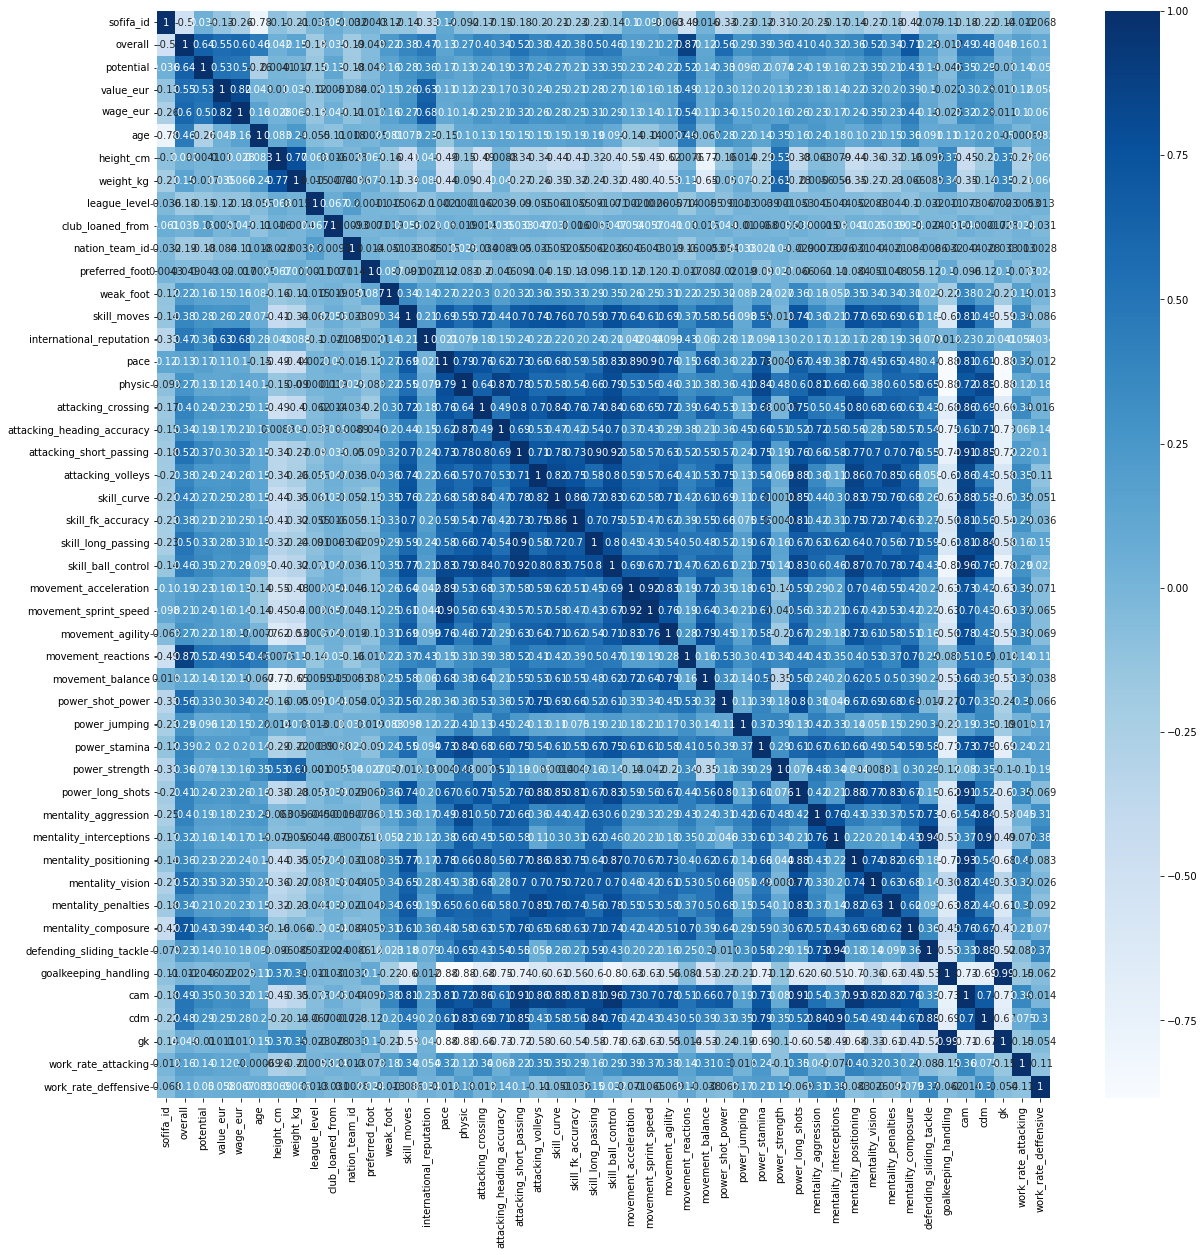

In [94]:
plt.rcParams['figure.figsize'] = (20, 20)
sns.heatmap(fifa.corr(), cmap='Blues', annot=True)

In [95]:
fifa.to_csv('fifa_56rows.csv')